    Ben Christensen
    Math 437
    October 10, 2018

# Lorenz Equations

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg as la
from scipy.stats import linregress

In [2]:
%matplotlib notebook

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy .integrate.odeint` to compute the solution.

In [3]:
def lorenz(v,t):
    """Implements Lorenz equations:
    
    ∂x/∂t = σ(y − x)
    ∂y/∂t = ρx − y − xz
    ∂z/∂t = xy − βz
        
    Parameters:
        v ((3,) ndarray): The state values (x,y,z)
        t (float): The time value t
    Returns:
        ((3,) ndarray): The derivative values
    """
    x,y,z = v
    return (σ*(y - x), ρ*x - y - x*z, x*y - β*z)

In [4]:
#Solve the ODE using the lorenz equations
σ, ρ, β = 10, 28, 8/3
time = np.linspace(0,30,100000)
sol = odeint(lorenz, np.random.uniform(-15,15,3), time)

<IPython.core.display.Javascript object>


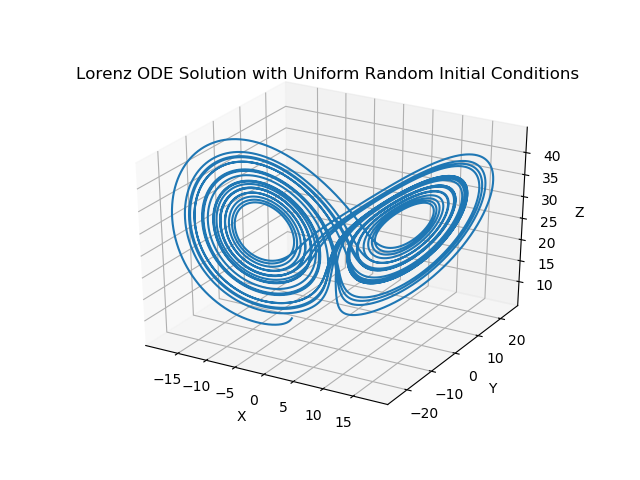

In [5]:
#Plot the solution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(sol[:,0], sol[:,1], sol[:,2])
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
plt.title("Lorenz ODE Solution with Uniform Random Initial Conditions")
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


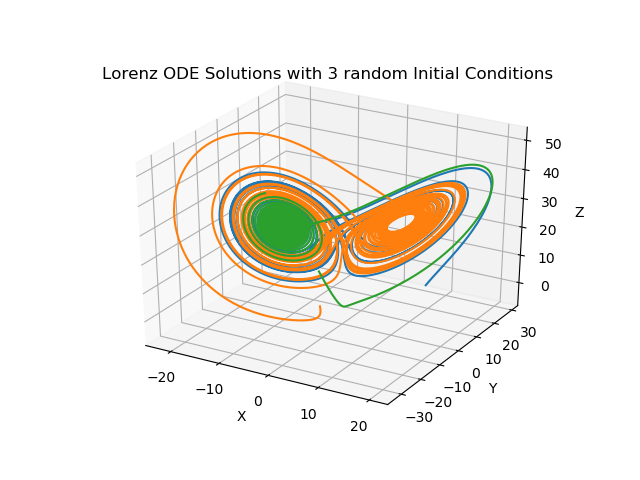

In [6]:
#Now plot three random solutions together
σ, ρ, β = 10, 28, 8/3
time = np.linspace(0,30,10000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(3):
    sol = odeint(lorenz, np.random.uniform(-15,15,3), time)
    plt.plot(sol[:,0], sol[:,1], sol[:,2])
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
plt.title("Lorenz ODE Solutions with 3 random Initial Conditions")
plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [7]:
time = np.linspace(0,30,10000)
initial_condition = np.random.uniform(-15,15,3)
sol1 = odeint(lorenz, initial_condition, time)
sol2 = odeint(lorenz, initial_condition + np.random.randn(3)*(1e-7), time)
#Prepare the animation plot
animation.writer = animation.writers['ffmpeg']
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 30)
ax.set_zlim(0, 50)
plt.title("Divergence of two Solutions of Lorenz")
#Initialize particle and trajectory plots for both ODEs
p_ode1, t_ode1 = plt.plot([],[],[],marker='o', color='r')[0], plt.plot([],[],[],color='r',alpha=0.5)[0]
p_ode2, t_ode2 = plt.plot([],[],[],marker='o', color='b')[0], plt.plot([],[],[],color='b',alpha=0.5)[0]


#Define an update function for the animation
def update(i):
    #ODE1
    p_ode1.set_data(sol1[i,0], sol1[i,1])
    p_ode1.set_3d_properties(sol1[i,2])
    t_ode1.set_data(sol1[:i+1,0], sol1[:i+1,1])
    t_ode1.set_3d_properties(sol1[:i+1,2]) 
    #ODE2
    p_ode2.set_data(sol2[i,0], sol2[i,1])
    p_ode2.set_3d_properties(sol2[i,2])
    t_ode2.set_data(sol2[:i+1,0], sol2[:i+1,1])
    t_ode2.set_3d_properties(sol2[:i+1,2])  
    
#Plot the animation with an interval of 10 m.seconds between frames
ani = animation.FuncAnimation(fig, update, frames=range(0,len(time),100), interval=40)
ani.save('lorenz_animation1.mp4')

## Problem 4
The `odeint` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the odeint arguments `(atol=1e-14, rtol=1e-12)` for the first approximation and `(atol=1e-15, rtol=1e-13)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [8]:
#Find two ODE solutions using different error tolerances
time = np.linspace(0,60,20000)
initial_condition = np.random.uniform(-15,15,3)
sol1 = odeint(lorenz, initial_condition, time, atol=1e-14, rtol=1e-12)
sol2 = odeint(lorenz, initial_condition, time, atol=1e-15, rtol=1e-13)
#Prepare the animation plot
animation.writer = animation.writers['ffmpeg']
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 30)
ax.set_zlim(0, 50)
plt.title("Divergence of Two Solutions with Different Tolerances")
#Initialize particle and trajectory plots for both ODEs
p_ode1, t_ode1 = plt.plot([],[],[],marker='o', color='r')[0], plt.plot([],[],[],color='r',alpha=0.5)[0]
p_ode2, t_ode2 = plt.plot([],[],[],marker='o', color='b')[0], plt.plot([],[],[],color='b',alpha=0.5)[0]
#Plot the animation with an interval of 10 m.seconds between frames
ani = animation.FuncAnimation(fig, update, frames=range(0,len(time),100), interval=40)
ani.save('lorenz_animation2.mp4')


## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by picking a random initial condition, and then solving the system forward in time for a while.
* Produce a second initial condition by adding a small perturbation: `np.random.randn(3)*(1e-10)`.
* For both initial conditions, use odeint to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the difference between the two approximate solutions.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Print your estimate for $\lambda$. Also use `plt.semilogy` to produce a semilog plot of $||\delta(t)||$ and the best-fit line you calculated.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, respectively, the best-fit exponential can be plotted on a semilog plot using `plt.semilogy(t,np.exp(a*t+b))`.

estimate for λ: 0.799596738915


<IPython.core.display.Javascript object>


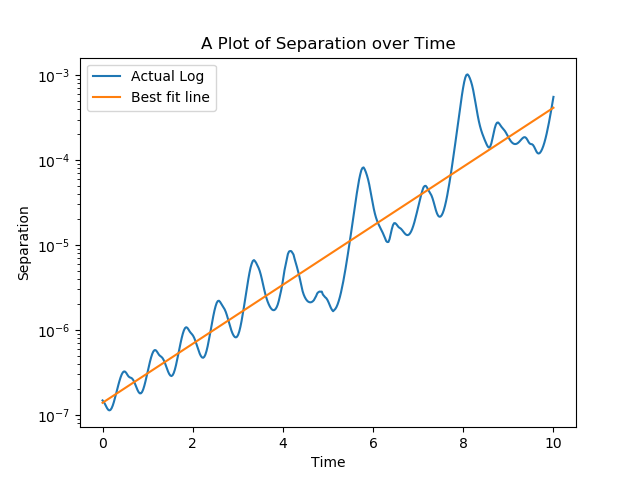

<IPython.core.display.Javascript object>


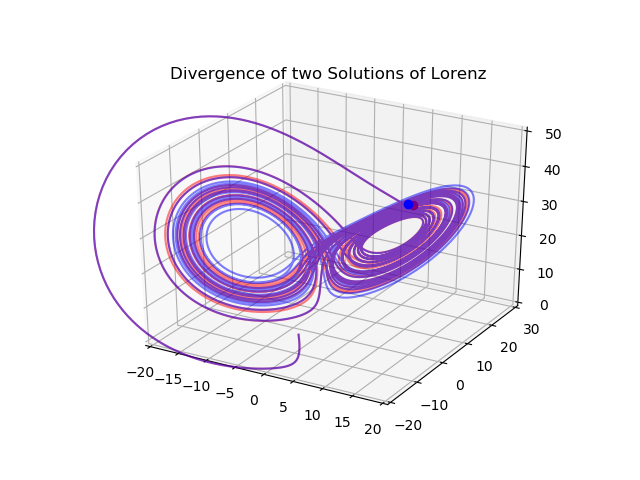

<IPython.core.display.Javascript object>


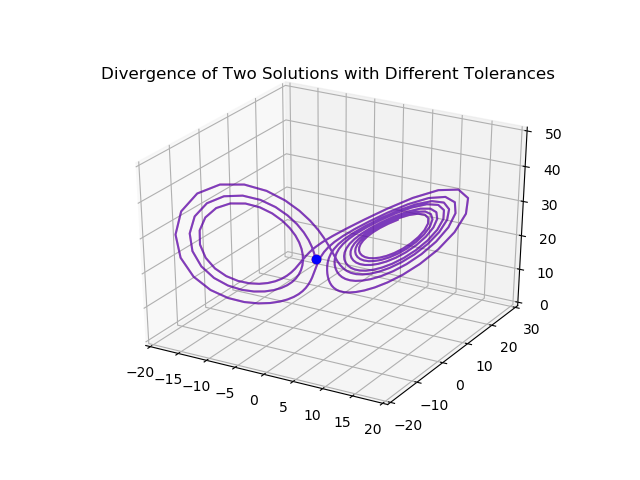

In [9]:
time = np.linspace(0,10,400)
#Create an initial_condition already on the attractor
initial_condition = np.random.uniform(-15,15,3)
sol = odeint(lorenz, initial_condition, time)
initial_condition = sol[int(len(sol)/2), :]
second_condition = initial_condition + np.random.randn(3)*(1e-7)
#Approximate solutions for t in [0,10] for the two initial conditions
sol1 = odeint(lorenz, initial_condition, time)
sol2 = odeint(lorenz, second_condition, time)
#Find  ||δ(t)||
norms = la.norm(sol1-sol2, axis=1)
slope, intercept = linregress(time, np.log(norms))[:2]
print("estimate for λ:", slope)
plt.ion()
fig = plt.figure()
plt.semilogy(time, norms, label="Actual Log")
plt.semilogy(time, np.exp(slope*time + intercept), label="Best fit line")
plt.xlabel("Time")
plt.ylabel("Separation")
plt.title("A Plot of Separation over Time")
plt.legend()
plt.show()

